### Integer Encoding
- 문자형을 숫자형 변수로 변경


In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'

df = pd.read_csv(url)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

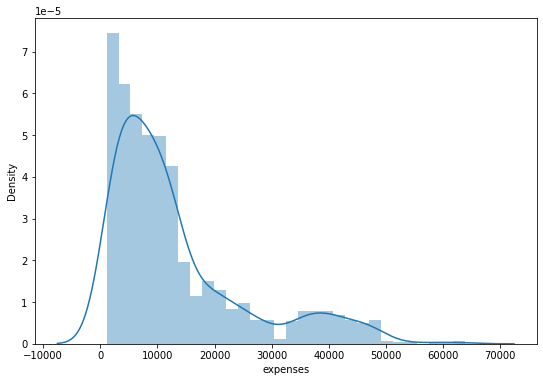

In [4]:
# 전체 의료비 분포
plt.figure(figsize=(9,6))
sns.distplot(df.expenses,hist=True,kde=True)
plt.show()

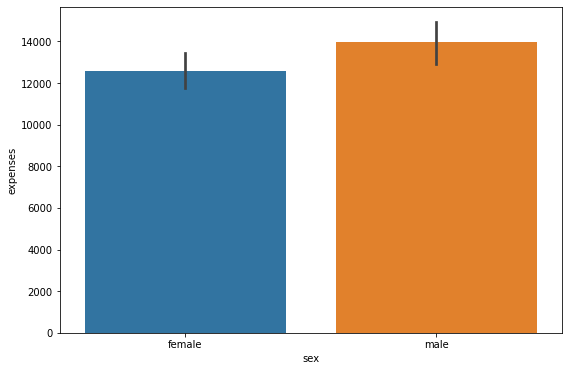

In [5]:
# 성별 의료비 분포
plt.figure(figsize=(9,6))
sns.barplot(x='sex',y='expenses',data=df)
plt.show()

In [6]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

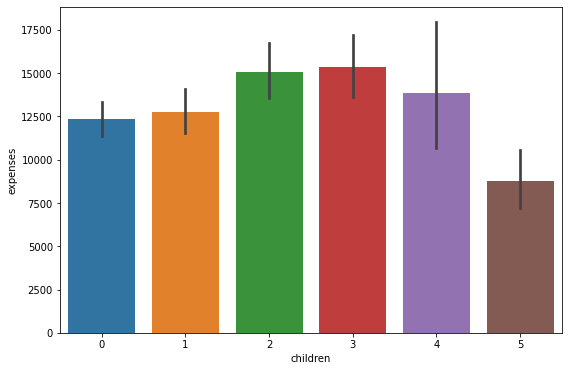

In [7]:
# 자녀 수별 의료비 분포
plt.figure(figsize=(9,6))
sns.barplot(x='children',y='expenses',data=df)
plt.show()

In [8]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

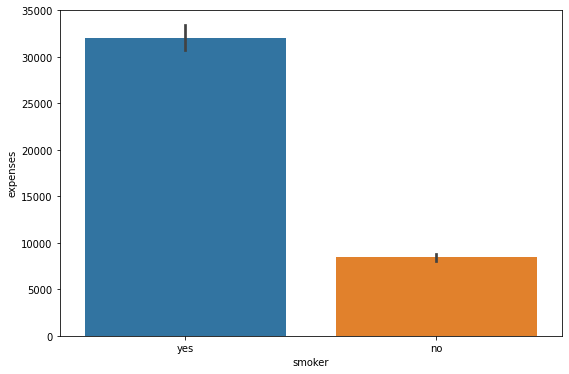

In [9]:
# 흡연여부 별 의료비 분포
plt.figure(figsize=(9,6))
sns.barplot(x='smoker',y='expenses',data=df)
plt.show()

In [10]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

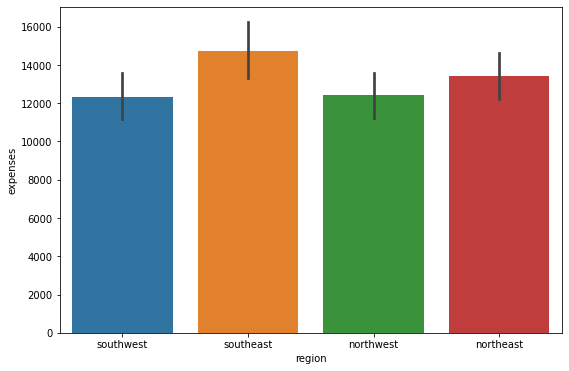

In [11]:
# 거주 지역별 의료비 분포
plt.figure(figsize=(9,6))
sns.barplot(x='region',y='expenses',data=df)
plt.show()

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

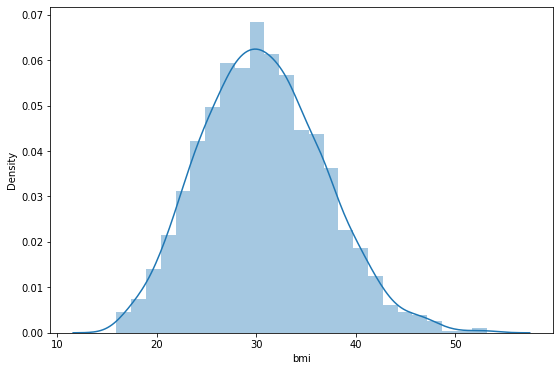

In [13]:
# bmi 분포
plt.figure(figsize=(9,6))
sns.distplot(df.bmi,
             hist=True,
             kde=True)
plt.show()

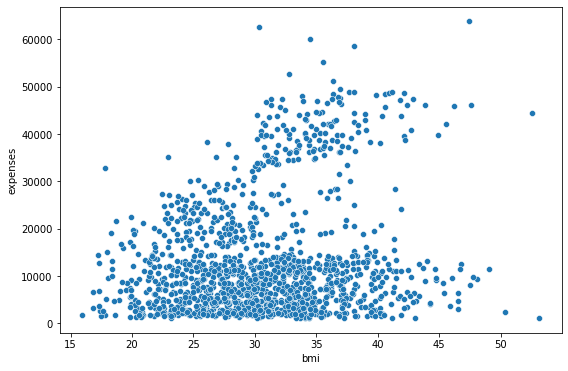

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='bmi',y='expenses',data=df)
plt.show()

In [15]:
# encoder
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
df.sex = encoder1.fit_transform(df.sex)
encoder2 = LabelEncoder()
df.smoker = encoder2.fit_transform(df.smoker)
encoder3 = LabelEncoder()
df.region = encoder3.fit_transform(df.region)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [17]:
from sklearn.model_selection import train_test_split

X=df[['age','sex']]
y=df['expenses']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2045)


In [18]:
from sklearn.linear_model import LinearRegression

ra=LinearRegression()
ra.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_hat=ra.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse2 = mean_squared_error(y_test,y_hat)

np.sqrt(mse2)

10633.607635499553

### 3.Stats Models

In [21]:
train_set,test_set=train_test_split(df,test_size=0.3,random_state=2045)

In [22]:
import statsmodels.formula.api as smf

model1= smf.ols(formula='expenses ~ age + sex',data=train_set).fit()

In [23]:
y_hat_1 = model1.predict(test_set[['age','sex']])

In [24]:
mse1 = mean_squared_error(test_set.expenses,y_hat_1)
np.sqrt(mse1)

10633.607635499553

In [25]:
# 결과비교
print('stats models : ',np.sqrt(mse1))
print('sklearn      : ',np.sqrt(mse2))

stats models :  10633.607635499553
sklearn      :  10633.607635499553
